# Project → Animal Classification

* Bu proje , görüntü işleme ve derin öğrenme tekniklerini pekiştirmek amacıyla hayvan sınıfları içeren bir veri setini kullanarak hayvan görüntülerini sınıflandırmayı amaçlamaktadır.



*  Hayvan Türleri:
    * Leopar
    * Yunus
    * Aslan
    * Tilki
    * Geyik
    * Tavşan
    * At
    * Sincap
    * Yarasa
    * Goril
    * antilop


      
*  Ham veri seti olarak hayvan türlerinin her birine ait 650 görüntü kullanılmıştır.

#### GEREKLİ KÜTÜPHANELER VE İŞLEVLERİ:


* os, shutil: Dosya ve klasör yönetimi işlemleri (ör. dosya taşıma, silme, kopyalama) için.
  
* OpenCV: Görüntü işleme, boyutlandırma, filtreleme ve çeşitli görüntü analiz işlemleri için.
  
* numpy: Sayısal hesaplamalar, matris işlemleri ve veri manipülasyonu için.

  
* ImageDataGenerator: Görüntü veri artırma (augmentation) ve veri hazırlığı için Keras aracı.

  
* train_test_split: Veri setini eğitim ve test alt kümelerine ayırmak için.

  
* LabelEncoder: Etiketleri (label) sayısal değerlere dönüştürmek için.

  
* Model, Dense, Flatten, Dropout, BatchNormalization: Keras'ta derin öğrenme modelleri oluşturmak için kullanılan temel katman ve düzenleme araçları.

  * Model: Keras'ta bir model oluşturmak için kullanılan temel yapı taşlarından biri.  İki ana model türü vardır:
  
    * Sequential Model: Katmanların sırayla dizildiği basit bir model türü.
    * Functional API: Daha karmaşık model yapıları için, özellikle dallanma ve birleştirme gibi işlemlere olanak tanır.
    * Dense:Tam bağlantılı (fully connected) katman. Her nöron, bir önceki katmandaki tüm nöronlara bağlıdır.
    * Kullanımı: Genellikle son katman olarak sınıflandırma veya regresyon için kullanılır. units parametresi, katmandaki nöron sayısını belirler.
    * Aktivasyon fonksiyonu (ör. relu, softmax) uygulanır.
    * Flatten: Çok boyutlu bir tensörü (ör. bir konvolüsyon katmanından gelen 2D veriyi) düzleştirerek tek boyutlu hale getirir.
    * Kullanımı: Genellikle bir evrişim (Conv2D) katmanından gelen çıktıyı, Dense katmanına bağlamadan önce kullanılır.
    * Dropout: Aşırı öğrenmeyi (overfitting) azaltmak için, belirli nöronları eğitim sırasında rastgele devre dışı bırakır.
    * Kullanımı: rate parametresi, devre dışı bırakılacak nöronların oranını belirler (ör. rate=0.5, %50'si devre dışı). Eğitim sırasında aktif, test sırasında pasif.
    * BatchNormalization: Her minibatch'in çıktısını, ortalama ve standart sapmayı normalize ederek modelin öğrenme sürecini hızlandırır ve kararlılığı artırır.
    * Kullanımı: Genellikle bir Dense veya Conv2D katmanından sonra eklenir. Normalizasyonun ardından aktivasyon fonksiyonunun uygulanması yaygındır. Aşırı öğrenmeyi önlemeye yardımcı olabilir.


  
* matplotlib.pyplot: Grafik çizmek ve sonuçları görselleştirmek için.

  
* tensorflow.keras: TensorFlow'un derin öğrenme için sunduğu yüksek seviyeli API.

  
* models, layers: Keras ile derin öğrenme modelleri ve katmanlar oluşturmak için.

# Gerekli Kütüphaneler (Required Libraries)

In [1]:
import os
import numpy as np
import shutil
import random
from glob import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, layers

## Veri Setini Hazırlamak (Data Preparation)


#### Bu bir classification model olduğundan klasörlerin isimleri sınıf isimleri(hayvan isimleridir).

* image_size: → (128, 128) olarak ayarlandı.
* source_dir → veri setini kaydettiğim kaynak dizin.
* train_dir, val_dir → Eğitim ve doğrulama verilerinin depolanacağı dizinler.
* classes → hayvan türleri
* image_per_class → Her sınıf için kullanıcak görüntü "650" tanedir. Görüntüleri rastgele karıştırdım.
* validation_split → Eğitim ve doğrulama verilerini ayıran orandır.
* train_dir, val_dir → eğitim için klasör oluşturma ve doğrulama için klasör oluşturmak.
  

In [2]:
"""
classes: İşlem yapılacak hayvan sınıflarını listeleyen bir dizi.
images_per_class: Her bir sınıf için alınacak maksimum resim sayısı (650 olarak belirlenmiş).
source_dir: Resimlerin kaynak dizini.
dest_dir: Resimlerin kopyalanacağı hedef dizin.

"""

import os
import shutil
from glob import glob

classes = ["leopard", "dolphin", "lion", "fox", "moose", "rabbit", "horse", "squirrel", "antelope", "gorilla", "cow"]
images_per_class = 650
source_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"
dest_dir = "/kaggle/working/FilteredImages/train"  # Çıktı dizinine yönlendirdik

os.makedirs(dest_dir, exist_ok=True)

for class_name in classes:
    source_path = os.path.join(source_dir, class_name)
    dest_class_path = os.path.join(dest_dir, class_name)

    os.makedirs(dest_class_path, exist_ok=True)
        
    images = glob(os.path.join(source_path, '*.jpg'))[:images_per_class]
    for img in images:
        shutil.copy(img, dest_class_path)

           

# Görsellerin İlgili Klasörlere Yüklenmesi (Uploading Images to Related Folders)

* Görseller yüklenip , eğitim için verileri 0'dan başlayıp artarak kodlayacağım
* Veri seti normalize (0-1 arası) edeceğim çünkü işlem süresini azaltmak istiyorum.
* x → ön işleme, y → her görsellerin doğru sınıf etiketi.

In [4]:
import cv2
import numpy as np

def load_images(data_dir, allowed_classes):
    # Bu fonksiyon, belirtilen dizindeki resimleri yükler, yeniden boyutlandırır ve sınıf etiketleriyle birlikte döndürür.
    
    images = []  # İşlenen resimleri saklamak için bir liste.
    labels = []  # Resimlerin sınıf etiketlerini saklamak için bir liste.

    # Ana dizindeki tüm klasörleri dolaşarak yalnızca izin verilen sınıfları işlemeye başlıyoruz.
    for class_name in os.listdir(data_dir):
        if class_name not in allowed_classes:
            continue  # Eğer sınıf izin verilenler arasında değilse, bu sınıfı atla.
        
        # Şu anki sınıfın tam dizin yolunu oluşturuyoruz.
        class_path = os.path.join(data_dir, class_name)
        
        # Bu sınıfa ait tüm resim dosyalarını dolaşıyoruz.
        for file_name in os.listdir(class_path):
            img_path = os.path.join(class_path, file_name)  # Resmin tam dosya yolunu oluştur.
            
            # Resmi OpenCV ile yükle (BGR formatında).
            img = cv2.imread(img_path)
            if img is not None:  # Eğer resim yükleme başarısız olmazsa:
                img = cv2.resize(img, (128, 128)) / 255.0  # Resmi 128x128 boyutuna getir ve 0-1 aralığında normalleştir.
                images.append(img)  # İşlenmiş resmi listeye ekle.
                labels.append(class_name)  # Sınıf etiketini listeye ekle.
    
    # İşlenen resimleri ve etiketleri numpy dizileri olarak döndür.
    return np.array(images), np.array(labels)

# Hedef dizinden izin verilen sınıflara ait resimleri yükle ve işlemeye başla.
X, y = load_images(dest_dir, classes)



# Veri Setinin Eğitime Hazırlanması (Data-Split)

#### Görsellerin %80'i eğitim %20'si doğrulama olarak ayrıldı.

In [5]:
import random

def split_data(source_dir, target_dir, classes, test_size=0.2):
    # Bu fonksiyon, verilen veri setini eğitim (train) ve doğrulama (validation) olarak ikiye ayırır.
    # source_dir: Resimlerin bulunduğu kaynak dizin.
    # target_dir: Eğitim ve doğrulama dizinlerinin oluşturulacağı hedef dizin.
    # classes: İşlenecek sınıf isimleri.
    # test_size: Doğrulama (validation) setine ayrılacak oranın büyüklüğü (varsayılan %20).

    # Eğer hedef dizin yoksa, oluşturuyoruz.
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    # Eğitim ve doğrulama alt dizinlerini oluşturuyoruz.
    train_dir = os.path.join(target_dir, 'train')  # Eğitim seti için dizin.
    val_dir = os.path.join(target_dir, 'val')  # Doğrulama seti için dizin.
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Tüm sınıfları tek tek işliyoruz.
    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)  # Şu anki sınıfın kaynak yolu.
        
        # Eğitim ve doğrulama için sınıfa özel alt dizinler oluşturuyoruz.
        class_train_dir = os.path.join(train_dir, class_name)  # Eğitim alt dizini.
        class_val_dir = os.path.join(val_dir, class_name)  # Doğrulama alt dizini.
        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)
        
        # Şu anki sınıfa ait tüm resimlerin listesini alıyoruz.
        images = os.listdir(class_path)
        random.shuffle(images)  # Resimleri karıştırıyoruz ki veri sıralı olmasın.
        
        # Eğitim ve doğrulama için ayırma işlemi.
        split_idx = int(len(images) * (1 - test_size))  # Eğitim seti için kullanılacak sınır indeksi.
        train_images = images[:split_idx]  # Eğitim setine gidecek resimler.
        val_images = images[split_idx:]  # Doğrulama setine gidecek resimler.
        
        # Eğitim seti resimlerini kopyalıyoruz.
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), class_train_dir)
        
        # Doğrulama seti resimlerini kopyalıyoruz.
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), class_val_dir)

# Eğitim ve doğrulama setlerini ayırmayı başlatıyoruz.
target_dir = "/kaggle/working/FilteredImages/split"  # Çıktı dizinine yönlendirdik
split_data(dest_dir, target_dir, classes, test_size=0.2)


#### Yaptığımız işlemin buraya kadar ki özeti:

* Kaynak ve Hedef Dizinler:

    * Kaynak (source_dir) Kaggle'da okuma izinlerine sahip bir konuma (/kaggle/input/...) ayarlandı.
    * Hedef (dest_dir ve target_dir) Kaggle'ın yazma izinlerine sahip çalışma alanına (/kaggle/working/...) taşındı.
      
* Yapılandırma:

    * Resimler, önce FilteredImages içinde filtreleniyor ve ardından split alt dizininde eğitim/doğrulama olarak ayrılıyor.
 
* Boyutlandırma ve Normalizasyon:
  
    * Resimler OpenCV ile 128x128 boyutlarına ayarlanıyor ve 0-1 aralığında normalize ediliyor.

## LabelEncoder Kullanılması
* Veriler to_categorical() fonksiyonu yardımıyla (0-9) arası one-hot-encoded hale getirilmiştir.
* train_test_split() fonksiyonuyla veriler (X) ve etiketler ise (y_categorical) eğitim ve test olarak ayrıldı.
* random_state → işlem tekrarı için rastgelelik sabitlemesi uygulanır.
* Eğitim için kullanılan görseller → X_train
* Test için kullanılan görseller → X_test
* Eğitim etiketleri → y_train
* Test etiketleri → y_test
  

* LabelEncoder ile Etiketleri Sayısallaştırma:

    * LabelEncoder ile kategorik olan y (sınıf isimleri) verisi sayısal değerlere dönüştürülüyor.
    * Örneğin, sınıflarımız ["leopard", "dolphin", "lion"] gibi ise, bunlar 0, 1, 2 şeklinde kodlanıyor.
* to_categorical ile Tek-Sıcak Kodlama (One-Hot Encoding):

    * Sayısal sınıf etiketleri (y_encoded), sinir ağlarının kullanımı için uygun bir format olan one hot encoding kodlama biçimine çevriliyor.
* Örneğin:

* 0 -> [1, 0, 0]
* 1 -> [0, 1, 0]
* 2 -> [0, 0, 1]

* Eğitim ve Test Verilerinin Bölünmesi:

    * train_test_split fonksiyonu, veri setini eğitim ve test seti olarak ikiye ayırıyor. %20'lik bir kısmı test seti olarak ayrılıyor (test_size=0.2).
    * random_state=17 ile bölme işlemi tekrarlanabilir hâle getiriliyor (her çalıştırmada aynı sonuçlar elde edilir).


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Etiketleri sayısallaştır ve one-hot encode et
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test setlerini böl
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=17)


#### Görselleştirmek:

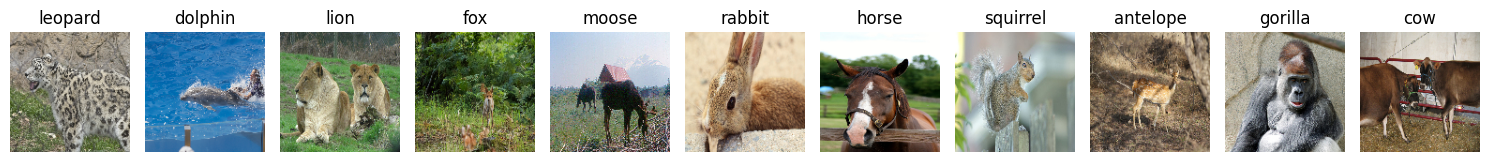

In [7]:
import matplotlib.pyplot as plt
import cv2
import os

def show_images_with_labels(data_dir, classes, img_size=(128, 128)):
    # Her sınıftan bir resim seç
    images = []
    labels = []
    
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        img_path = os.path.join(class_dir, os.listdir(class_dir)[0])  # İlk resmi seç
        img = cv2.imread(img_path)  # Resmi yükle
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Renkleri düzelt (BGR -> RGB)
        img = cv2.resize(img, img_size)  # Yeniden boyutlandır
        images.append(img)
        labels.append(class_name)
    
    # Görselleri yan yana çiz
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(labels[i])  # Başlık olarak sınıf adını ekle
        ax.axis("off")  # Eksenleri kaldır
    plt.tight_layout()
    plt.show()

# Görselleri göstermek için çağır
show_images_with_labels(dest_dir, classes)


# Veri Artıma İşlemi (Data Generators)

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],  # Parlaklık değişimi
    channel_shift_range=50.0,     # Renk kanalı kaydırması
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(X_train)

# Data Augmentation

* Döndürme:

    * Görüntüler rastgele -30 ile 30 derece arasında döndürülür.
    * Döndürme işlemi için cv2.getRotationMatrix2D ve cv2.warpAffine kullanılır.
* Tuz-Biber Gürültüsü:

    * add_salt_and_pepper_noise fonksiyonu ile görüntülere tuz-biber gürültüsü eklenir.
    * amount parametresi, toplam gürültü miktarını kontrol eder (ör. %2).
* Artırma ve Kaydetme:

    * Yeni artırılmış görüntüler orijinal sınıf klasörüne aug_ prefix'i ile kaydedilir.
    * Hedeflenen örnek sayısına ulaşılana kadar işlem devam eder.

leopard: 520 mevcut örnek
leopard: 480 yeni örnek oluşturulacak.
leopard sınıfı için artırma tamamlandı.
dolphin: 520 mevcut örnek
dolphin: 480 yeni örnek oluşturulacak.
dolphin sınıfı için artırma tamamlandı.
lion: 520 mevcut örnek
lion: 480 yeni örnek oluşturulacak.
lion sınıfı için artırma tamamlandı.
fox: 520 mevcut örnek
fox: 480 yeni örnek oluşturulacak.
fox sınıfı için artırma tamamlandı.
moose: 520 mevcut örnek
moose: 480 yeni örnek oluşturulacak.
moose sınıfı için artırma tamamlandı.
rabbit: 520 mevcut örnek
rabbit: 480 yeni örnek oluşturulacak.
rabbit sınıfı için artırma tamamlandı.
horse: 520 mevcut örnek
horse: 480 yeni örnek oluşturulacak.
horse sınıfı için artırma tamamlandı.
squirrel: 520 mevcut örnek
squirrel: 480 yeni örnek oluşturulacak.
squirrel sınıfı için artırma tamamlandı.
antelope: 520 mevcut örnek
antelope: 480 yeni örnek oluşturulacak.
antelope sınıfı için artırma tamamlandı.
gorilla: 520 mevcut örnek
gorilla: 480 yeni örnek oluşturulacak.
gorilla sınıfı için 

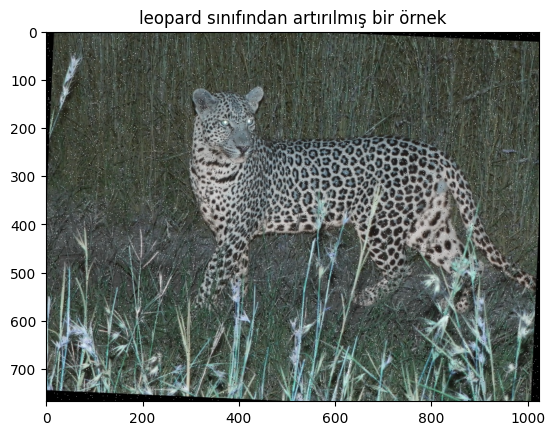

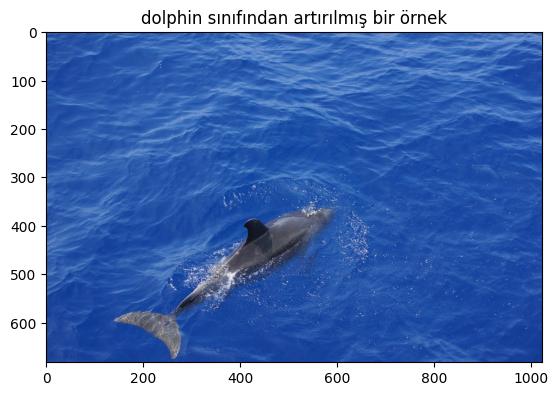

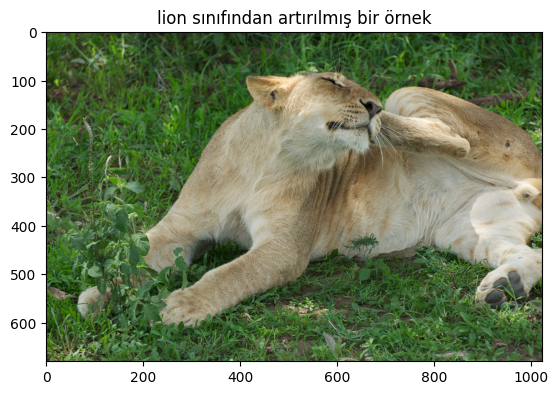

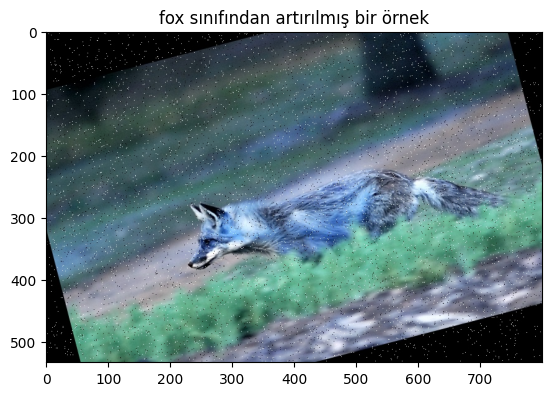

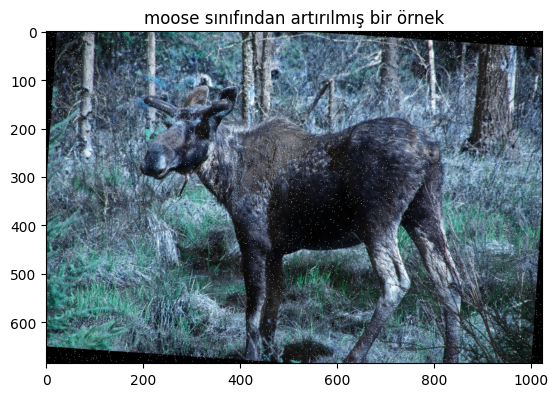

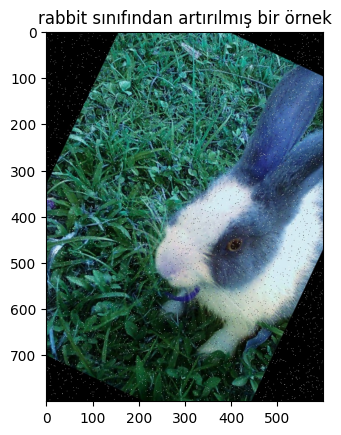

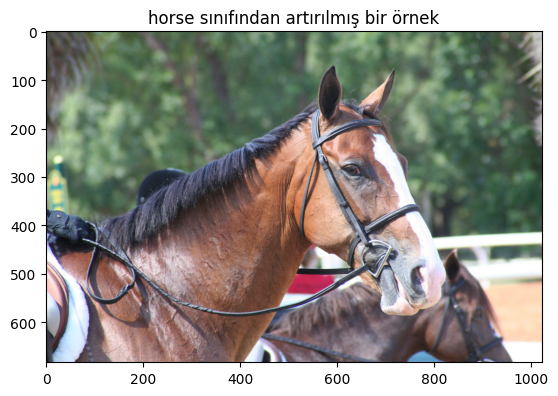

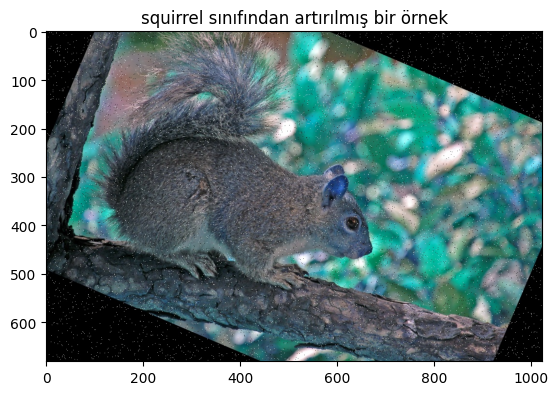

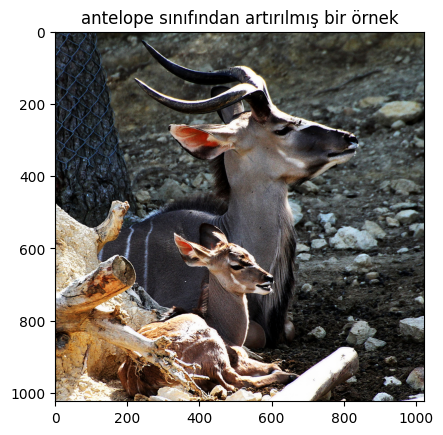

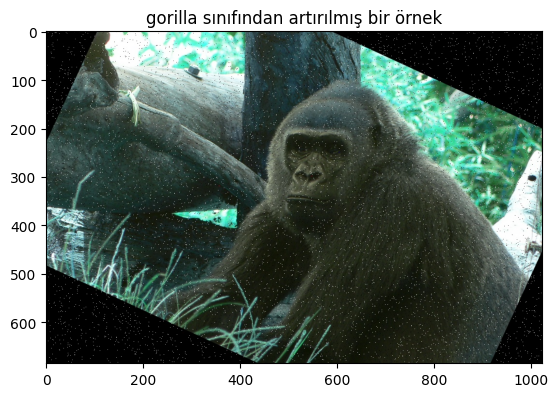

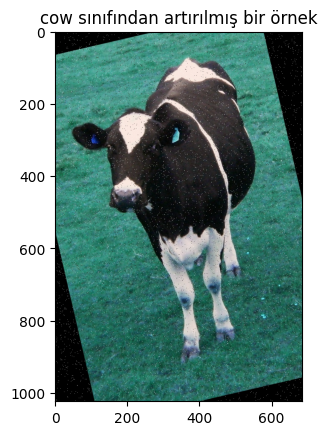

In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

# Sınıflar ve veri yolları
base_path = "/kaggle/working/FilteredImages/split/train"
classes = ["leopard", "dolphin", "lion", "fox", "moose", "rabbit", "horse", "squirrel", "antelope", "gorilla", "cow"]

# Hedeflenen örnek sayısı
target_size = 1000

# Tuz-biber gürültüsü ekleyen fonksiyon
def add_salt_and_pepper_noise(image, amount=0.02, salt_vs_pepper=0.5):
    row, col, ch = image.shape
    out = np.copy(image)

    # Salt (beyaz noktalar)
    num_salt = np.ceil(amount * row * col * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape[:2]]
    out[coords[0], coords[1], :] = 255

    # Pepper (siyah noktalar)
    num_pepper = np.ceil(amount * row * col * (1.0 - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape[:2]]
    out[coords[0], coords[1], :] = 0

    return out

# Her sınıf için işlem
for cls in classes:
    cls_path = os.path.join(base_path, cls)
    if not os.path.exists(cls_path):
        print(f"Sınıf klasörü bulunamadı: {cls_path}")
        continue

    # Mevcut dosyaları yükle
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    print(f"{cls}: {len(files)} mevcut örnek")

    # Eksik sayıyı hesapla
    missing_count = target_size - len(files)
    if missing_count <= 0:
        print(f"{cls} sınıfı zaten yeterli örneğe sahip.")
        continue

    print(f"{cls}: {missing_count} yeni örnek oluşturulacak.")

    # Veri artırma işlemi
    for file in files:
        if missing_count <= 0:
            break

        img_path = os.path.join(cls_path, file)
        img = load_img(img_path)
        img_array = img_to_array(img).astype(np.uint8)

        # Döndürme
        angle = np.random.uniform(-30, 30)  # -30 ile 30 derece arasında rastgele döndürme
        h, w = img_array.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
        rotated_img = cv2.warpAffine(img_array, rotation_matrix, (w, h))

        # Tuz-biber gürültüsü ekleme
        noisy_img = add_salt_and_pepper_noise(rotated_img)

        # Yeni görüntüyü kaydet
        augmented_path = os.path.join(cls_path, f"aug_{file.split('.')[0]}_{missing_count}.jpeg")
        cv2.imwrite(augmented_path, noisy_img)

        missing_count -= 1

    print(f"{cls} sınıfı için artırma tamamlandı.")

# Görüntü örneğini ekranda gösterme
for cls in classes:
    cls_path = os.path.join(base_path, cls)
    files = [f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]
    img_path = os.path.join(cls_path, files[-1])  # Son artırılmış örneği al
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"{cls} sınıfından artırılmış bir örnek")
    plt.show()


#### Not: Burada Veri setimin içindeki görüntüler neden 520 sayıda onu anlayamadım normalde 650 seçmiştim.

# CNN EĞİTİMİ

* Input Layer: Görselleri 128x128 boyutlarında ve RGB formatında alır.
* Conv2D: Görsellerdeki temel özellikleri (kenar, renk vb.) öğrenmek için filtreler uygular.
* MaxPooling2D: Görsel boyutunu küçültüp işlem yükünü azaltır.
* Flatten: 2D çıktıyı tek boyutlu vektöre dönüştürür.
* Dense Layers: Öğrenilen özellikleri daha soyut seviyelerde temsil eder ve sınıflandırma yapar.
* Output Layer: Her sınıf için bir tahmin yapar ve softmax fonksiyonu ile sonuçları normalize eder.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 29s 132ms/step - accuracy: 0.2603 - loss: 12.6285 - val_accuracy: 0.4212 - val_loss: 1.6775
Epoch 2/150
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5625 - loss: 1.3734

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5625 - loss: 1.3734 - val_accuracy: 0.4545 - val_loss: 1.5101
Epoch 3/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.4421 - loss: 1.6242 - val_accuracy: 0.4631 - val_loss: 1.5728
Epoch 4/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.4375 - loss: 1.5519 - val_accuracy: 0.3182 - val_loss: 1.6369
Epoch 5/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.4909 - loss: 1.4747 - val_accuracy: 0.4766 - val_loss: 1.5468
Epoch 6/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.5938 - loss: 1.3702 - val_accuracy: 0.3636 - val_loss: 1.5943
Epoch 7/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.5021 - loss: 1.4331 - val_accuracy: 0.4830 - val_loss: 1.4996
Epoch 8/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.4375 - loss: 1.8248 - val_accuracy: 0.5909 - val_loss: 1.5083
Epoch 9/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.5233 - loss: 1.3851 - va

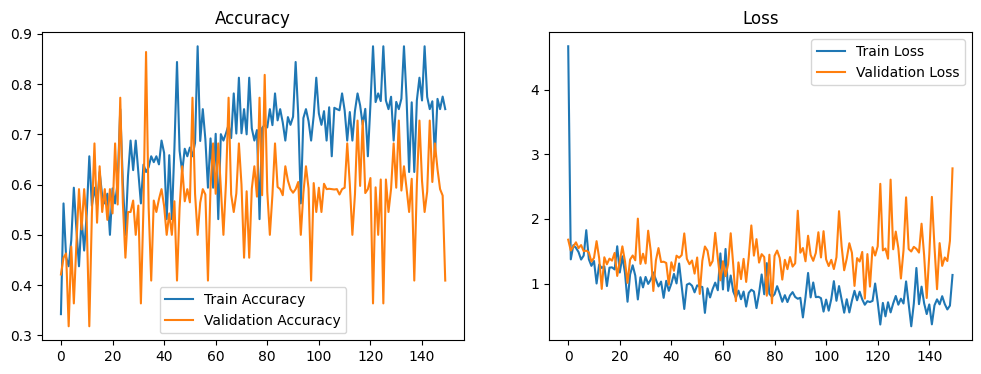

In [10]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

# Model tanımı
model_cnn = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3)),
    LeakyReLU(alpha=0.1),  # Leaky ReLU aktivasyonu
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),  # Düzleştirme katmanı
    layers.Dense(128),
    LeakyReLU(alpha=0.1),  # Leaky ReLU aktivasyonu
    layers.Dense(len(classes), activation='softmax')  # Çıkış katmanı
])

# Modelin derlenmesi (compile)
model_cnn.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizasyon algoritması
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Veri artırma ayarları
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplanıyor
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modelin eğitilmesi
history = model_cnn.fit(
    train_generator,
    validation_data=test_generator,
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

# Modeli kaydetme
model_cnn.save('trained_model.h5')

# Eğitim sonuçlarının görselleştirilmesi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

#### Daha fazla epoch ile daha iyi bir sonuç alınacağı düşünülmektedir.
#### Veri setini biraz daha çoğaltma uygulayarak daha stabil hale getirilebileceği düşünülmektedir.,
#### Optimizer olarak adam yerine RMSprop denemek istedim daha önce denemediğim bir optimizerdi ve genelde kullanılan relu yerine aktivasyon fonksiyonu yerine leakly relu denemek istedim. Aynı parametreler kullanarak adam ve relu kullanıp aradaki fark ölçülebilir.



# ADAM ve Relu kullanarak aynı eğitimi yapmak:

Epoch 1/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.2226 - loss: 3.4703 - val_accuracy: 0.3857 - val_loss: 1.7539
Epoch 2/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3750 - loss: 1.8381 - val_accuracy: 0.3636 - val_loss: 1.6582
Epoch 3/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 125ms/step - accuracy: 0.4279 - loss: 1.6603 - val_accuracy: 0.4531 - val_loss: 1.5868
Epoch 4/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.4688 - loss: 1.5702 - val_accuracy: 0.5000 - val_loss: 1.3767
Epoch 5/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.4656 - loss: 1.5349 - val_accuracy: 0.4787 - val_loss: 1.5144
Epoch 6/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.5312 - loss: 1.2405 - val_accuracy: 0.4091 - val_loss: 1.7753
Epoch 7/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 126ms/step - accuracy: 0.4934 - loss: 1.4671 - val_accuracy: 0.4645 - val_loss: 1.5460
Epoch 8/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.4688 - loss:

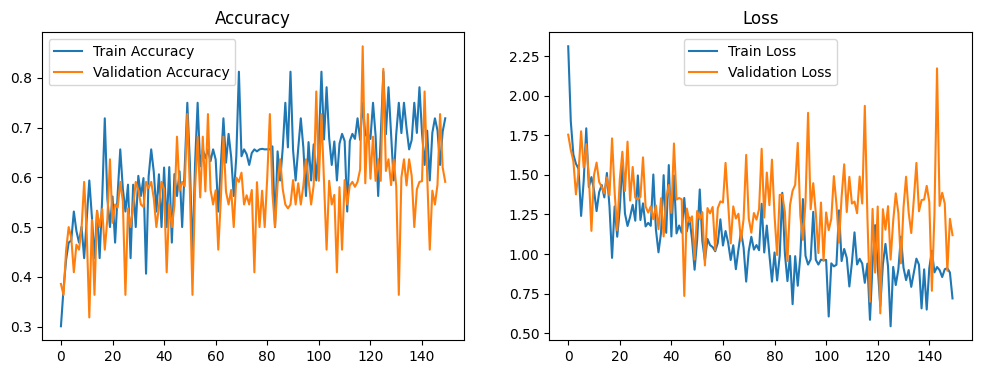

In [15]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Model tanımı
model_cnn = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),  # ReLU aktivasyonu
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),  # Düzleştirme katmanı
    layers.Dense(128, activation='relu'),  # ReLU aktivasyonu
    layers.Dense(len(classes), activation='softmax')  # Çıkış katmanı
])

# Modelin derlenmesi (compile)
model_cnn.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Adam optimizasyon algoritması
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Veri artırma ayarları
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Eğitim ve doğrulama jeneratörleri
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps hesaplanıyor
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# Modelin eğitilmesi
history = model_cnn.fit(
    train_generator,
    validation_data=test_generator,
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

# Modeli kaydetme
model_cnn.save('trained_model_adamoptimizer.h5')

# Eğitim sonuçlarının görselleştirilmesi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


# RMSprop ve ADAM , LeakyRelu ve Relu Sonuçlarını Karşılaştırmak 

* RMSprop optimizasyon algoritması ve Leaky ReLU aktivasyon fonksiyonunun kombinasyonu, eğitim sürecinde Adam ve ReLU kombinasyonuna göre daha yavaş bir şekilde sonuçlandı. Ancak, RMSprop ve Leaky ReLU kullanıldığında daha iyi doğruluk elde edildi.

* RMSprop, özellikle küçük ve tutarsız gradyanlarda kararlı bir öğrenme sağlamaya odaklanırken, Adam daha hızlı bir şekilde yakınsamayı hedefler. Aktivasyon fonksiyonlarında ise Leaky ReLU, negatif giriş değerlerine küçük bir eğim tanıyarak "ölü nöron" problemini hafifletir, ReLU ise sıfırdan küçük değerleri tamamen sıfırlar. Bu özellikler, Leaky ReLU'nun daha kararlı bir öğrenmeye katkı sağlamasına ve genel doğruluğu artırmasına yardımcı olmuş olabilir.

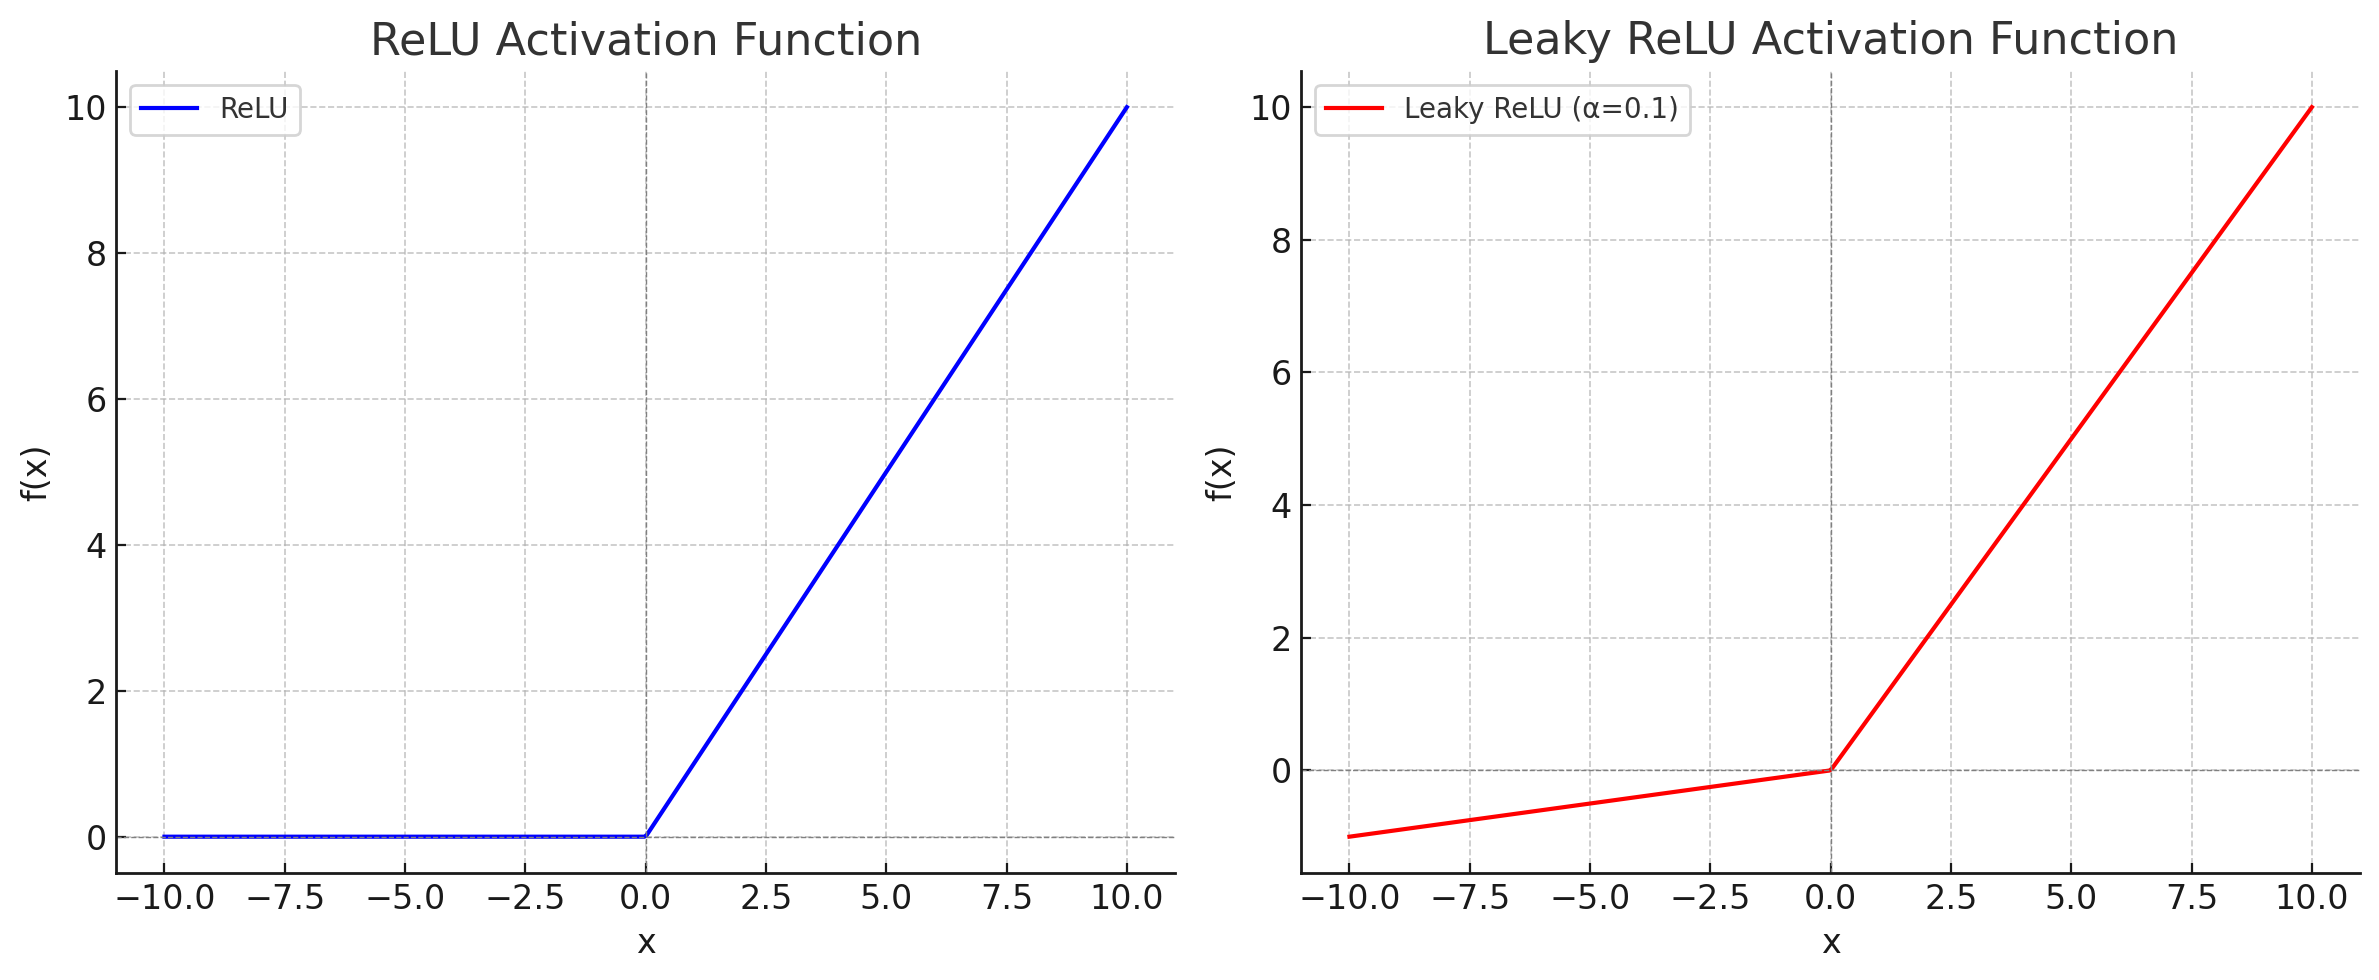

* ReLU (Rectified Linear Unit): Pozitif girişlerde doğrusal bir şekilde artarken, negatif girişlerde çıktıyı sıfıra sabitler.
Leaky ReLU: Negatif girişlerde sıfır yerine küçük bir eğimle artış sağlar. Bu, gradyan sıfırlama sorunlarını hafifletir.

# Farklı Test Setleri Üzerinde Model Performansının Değerlendirilmesi ve Karşılaştırılması

* Bu aşamada , modelin farklı durumlar altında nasıl performans gösterdiğini analiz etmeyi amaçladım. Öncelikle test setindeki görüntüleri parlaklık ve kontrast açısından manipüle ettim. Daha sonra bu manipüle edilmiş görüntülere, renk sabitliği sağlamak için Gray World algoritmasını uyguladım. Bu sayede, modelin farklı senaryolara karşı dayanıklılığını değerlendirmek için veri setini zenginleştirdim ve analiz için hazır hale getirdim.

In [14]:
import numpy as np
import os
from keras.models import load_model

# Eğitilmiş modeli yükle
model_cnn = load_model('/kaggle/working/trained_model.h5')  # Modelinizi doğru yoldan yükleyin

# 5. Resimlerin Farklı Işıklar ile Manipüle Edilmesi
# Test seti: X_test, y_test (önceden tanımlı olduğu varsayılmıştır)
def get_manipulated_images(image, brightness_factor=1.2, contrast_factor=1.5):
    manipulated = image * brightness_factor  # Parlaklık ayarı
    manipulated = ((manipulated - 127.5) * contrast_factor) + 127.5  # Kontrast ayarı
    manipulated = np.clip(manipulated, 0, 255).astype(np.uint8)
    return manipulated

# Manipüle edilmiş test seti oluşturma
X_test_manipulated = np.array([get_manipulated_images(img) for img in X_test])

# İsteğe bağlı: Manipüle edilmiş resimleri kaydetme
os.makedirs("manipulated_images", exist_ok=True)
for i, img in enumerate(X_test_manipulated):
    file_path = f"manipulated_images/image_{i}.png"
    # Kaydetme işlemi (örneğin OpenCV veya PIL kullanılabilir)
    # cv2.imwrite(file_path, img)  # Örnek: OpenCV ile kaydetme

# 7. Manipüle Edilmiş Test Setine Renk Sabitliği Algoritması Uygulanması
def get_wb_images(image):
    mean_rgb = np.mean(image, axis=(0, 1))  # Her kanal için ortalama
    avg_gray = np.mean(mean_rgb)  # Gri dünya ortalaması

    # Sıfır bölme hatasını önlemek için kontrol
    mean_rgb[mean_rgb == 0] = 1e-5  # Çok düşük değerlere bir eşik değeri atama

    scale = avg_gray / mean_rgb
    wb_image = image * scale[np.newaxis, np.newaxis, :]
    wb_image = np.clip(wb_image, 0, 255).astype(np.uint8)
    return wb_image


# Renk sabitliği uygulanmış test seti oluşturma
X_test_corrected = np.array([get_wb_images(img) for img in X_test_manipulated])

# Manipüle edilmiş test seti ile modelin değerlendirilmesi
manipulated_loss, manipulated_accuracy = model_cnn.evaluate(X_test_manipulated, y_test, verbose=0)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")

# Renk sabitliği uygulanmış test seti ile modelin değerlendirilmesi
corrected_loss, corrected_accuracy = model_cnn.evaluate(X_test_corrected, y_test, verbose=0)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")

# Orijinal test seti ile modelin değerlendirilmesi
original_loss, original_accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"Orijinal Test Seti Doğruluğu: {original_accuracy * 100:.2f}%")



Manipüle Edilmiş Test Seti Doğruluğu: 8.81%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 8.81%
Orijinal Test Seti Doğruluğu: 56.85%


# Sonuç : 

* Orijinal test setinde modelin doğruluğu gayet iyi çıkarken, manipüle edilmiş ve renk sabitliği uygulanmış test setlerinde doğruluk oranı ciddi şekilde düştü. Bu durum, modelin farklı ışık koşullarına karşı duyarlı olduğunu ve bu tür manipülasyonlara uygun şekilde eğitilmediğini gösteriyor. Veri augmentasyonu ve daha gelişmiş renk sabitliği yöntemleriyle bu sorunun üstesinden gelinebilir.